In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import re
import string
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import spacy
#import matplotlib

In [6]:
df = pd.read_csv('NYC_Jobs.csv', encoding='utf-8')
df.head()

Job ID                         Agency Posting Type  # Of Positions  \
0  533891    HRA/DEPT OF SOCIAL SERVICES     External               1   
1  554785   DEPARTMENT OF TRANSPORTATION     External               1   
2  568481  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  527833          NYC HOUSING AUTHORITY     External               1   
4  541555                FIRE DEPARTMENT     External               1   

           Business Title        Civil Service Title Title Classification  \
0        CONTRACT ANALYST              STAFF ANALYST        Competitive-1   
1         DESIGN ENGINEER   CIVIL ENGINEERING INTERN        Competitive-1   
2                Director  ADM PROC ANAL-NM FRM M1-3        Competitive-1   
3             ELECTRICIAN                ELECTRICIAN        Competitive-1   
4  Director, Data Quality    CITY RESEARCH SCIENTIST    Non-Competitive-5   

  Title Code No Level                                       Job Category  ...  \
0         12626    02  Administration & Human Resources Policy, Resea...  ...   
1         20202    00              Engineering, Architecture, & Planning  ...   
2         8297A    00                 Finance, Accounting, & Procurement  ...   
3         91717    00                  Building Operations & Maintenance  ...   
4         21744    4A  Technology, Data & Innovation Policy, Research...  ...   

                              Additional Information  \
0  **LOAN FORGIVENESS The federal government prov...   
1  As a current or prospective employee of the Ci...   
2                                                NaN   
3  1.\tFor NYCHA employees, these positions are o...   
4  ***LOAN FORGIVENESS: As a current or prospecti...   

                                            To Apply  Hours/Shift  \
0  APPLICANTS MUST BE PERMANENT IN THE STAFF ANAL...          NaN   
1  RESUMES MUST BE SUBMITTED ELECTRONICALLY USING...          NaN   
2  For City Employees, please go to Employee Self...     35 Hours   
3                        Click the Apply Now button.          NaN   
4  NON-CITY EMPLOYEES/EXTERNAL CANDIDATES PLEASE ...          NaN   

                    Work Location 1 Recruitment Contact  \
0                               NaN                 NaN   
1                               NaN                 NaN   
2  30-30 Thomson Ave, LIC, NY 11101                 NaN   
3                               NaN                 NaN   
4                               NaN                 NaN   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   05/27/2022   
1  New York City Residency is not required for th...   10/12/2022   
2  New York City residency is generally required ...   01/20/2023   
3               NYCHA has no residency requirements.   04/13/2022   
4  New York City residency is generally required ...   08/10/2022   

    Post Until Posting Updated Process Date  
0          NaN      11/07/2022   02/07/2023  
1          NaN      12/28/2022   02/07/2023  
2  21-MAR-2023      01/20/2023   02/07/2023  
3          NaN      05/12/2022   02/07/2023  
4          NaN      08/10/2022   02/07/2023  

[5 rows x 30 columns]

In [7]:
df.shape

(5934, 30)

In [8]:
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     231
Career Level                        2
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          47
Preferred Skills                  862
Additional Information           1204
To Apply                            1
Hours/Shift                      3834
Work Location 1                  3358
Recruitment Contact              5934
Residency Requirement               0
Posting Date

In [9]:
df['Job Category'].unique()

array(['Administration & Human Resources Policy, Research & Analysis Social Services',
       'Engineering, Architecture, & Planning',
       'Finance, Accounting, & Procurement',
       'Building Operations & Maintenance',
       'Technology, Data & Innovation Policy, Research & Analysis',
       'Constituent Services & Community Programs', 'Health',
       'Legal Affairs',
       'Health Public Safety, Inspections, & Enforcement',
       'Social Services',
       'Administration & Human Resources Social Services',
       'Technology, Data & Innovation',
       'Administration & Human Resources',
       'Constituent Services & Community Programs Engineering, Architecture, & Planning',
       'Constituent Services & Community Programs Legal Affairs Social Services',
       'Constituent Services & Community Programs Public Safety, Inspections, & Enforcement',
       'Constituent Services & Community Programs Social Services',
       'Public Safety, Inspections, & Enforcement',
       'E

In [10]:
df['Business Title'].unique()

array(['CONTRACT ANALYST', 'DESIGN ENGINEER', 'Director', ...,
       'BOOKKEEPER', 'Medicolegal Investigator Supervisor',
       'PARALEGAL AIDE - LEVEL 2'], dtype=object)

In [11]:
len(df[df['Agency']=='DEPT OF ENVIRONMENT PROTECTION'])

851

In [12]:
df['Civil Service Title'].unique()

array(['STAFF ANALYST', 'CIVIL ENGINEERING INTERN',
       'ADM PROC ANAL-NM FRM M1-3', 'ELECTRICIAN',
       'CITY RESEARCH SCIENTIST', 'COMMUNITY COORDINATOR',
       'SUPERVISING PUBLIC HEALTH ADVI', 'AGENCY ATTORNEY',
       'PARALEGAL AIDE', 'PUBLIC HEALTH SANITARIAN',
       'PRINCIPAL ADMINISTRATIVE ASSOC', 'CLAIM SPECIALIST',
       'IT PROJECT SPECIALIST', 'ADM MANAGER-NON-MGRL FRM M1/M2',
       'EXECUTIVE AGENCY COUNSEL', 'DIRECTOR OF FIELD OPERATIONS (',
       'ADMIN COMMUNITY RELATIONS SPEC', 'SOCIAL WORKER',
       'CASE - MANAGEMENT NURSE (FIRE', 'COMMUNITY ASSOCIATE',
       'SENIOR IT ARCHITECT', 'CLERICAL ASSOCIATE',
       'SUMMER COLLEGE INTERN', 'RECREATION DIRECTOR',
       'ASSISTANT CIVIL ENGINEER', 'PLASTERER', 'EXTERMINATOR',
       'COMPUTER SPECIALIST (SOFTWARE)', 'CITY PLANNER',
       'PROGRAM EVALUATOR (ACS)', 'ADMINISTRATIVE PRINTING SERVIC',
       'ADMINISTRATIVE PUBLIC RECORDS', 'PROCUREMENT ANALYST',
       'ELIGIBILITY SPECIALIST', 'WATERSHED MAINT

<Figure size 800x800 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Minimum Qualification')

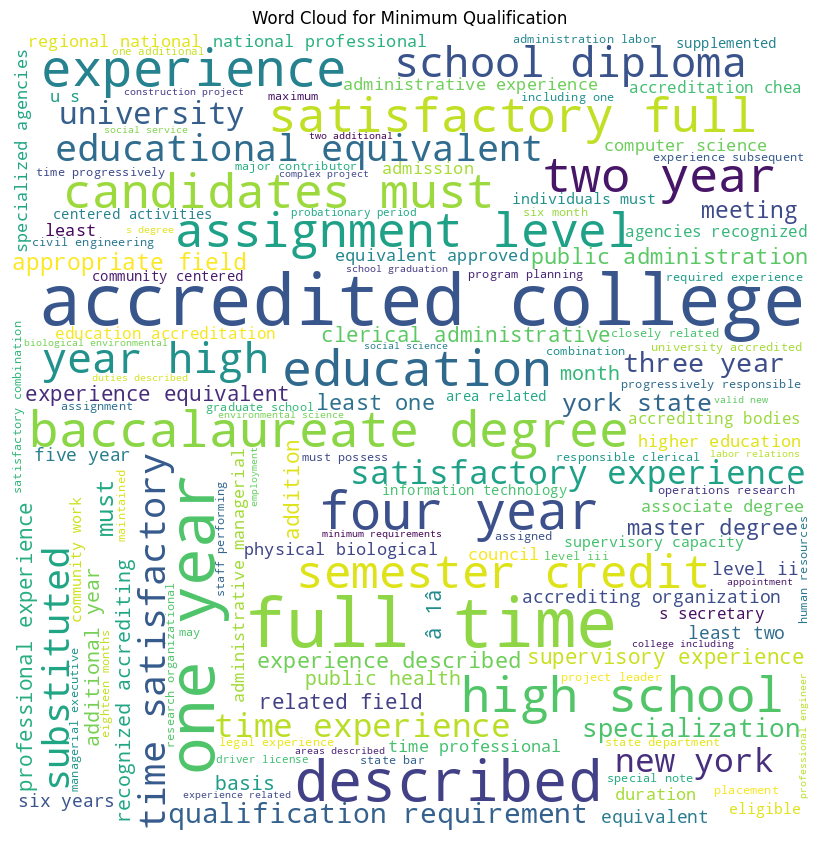

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['Minimum Qual Requirements']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Minimum Qualification")

plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Job Category')

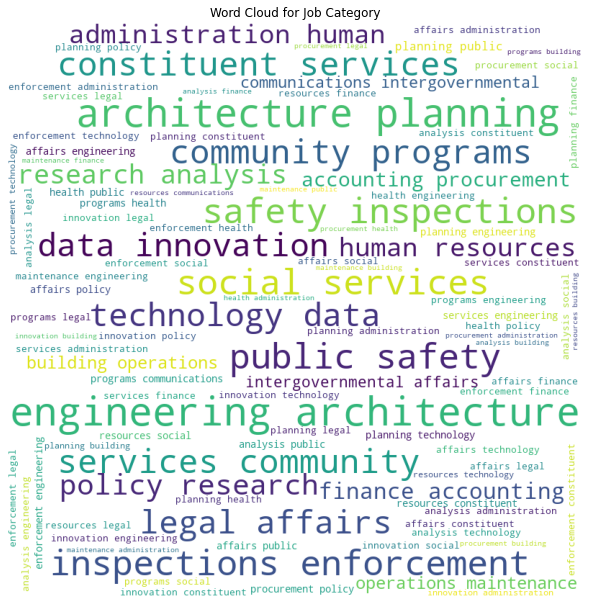

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['Job Category']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Job Category")

plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Job Description')

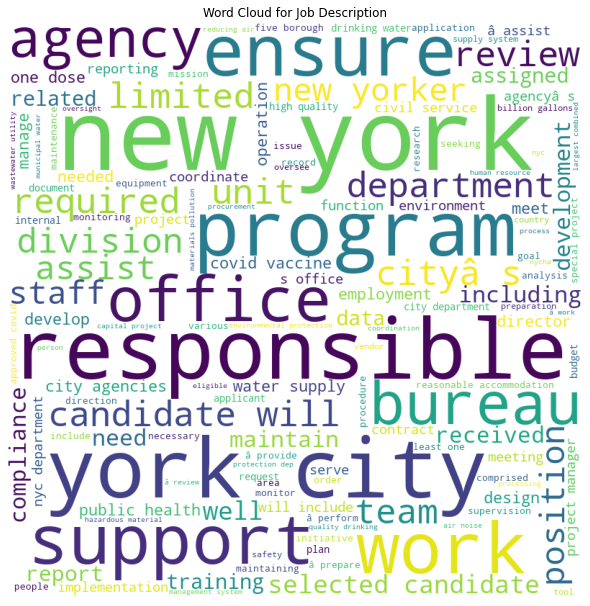

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['Job Description']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Job Description")

plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Preferred Skills')

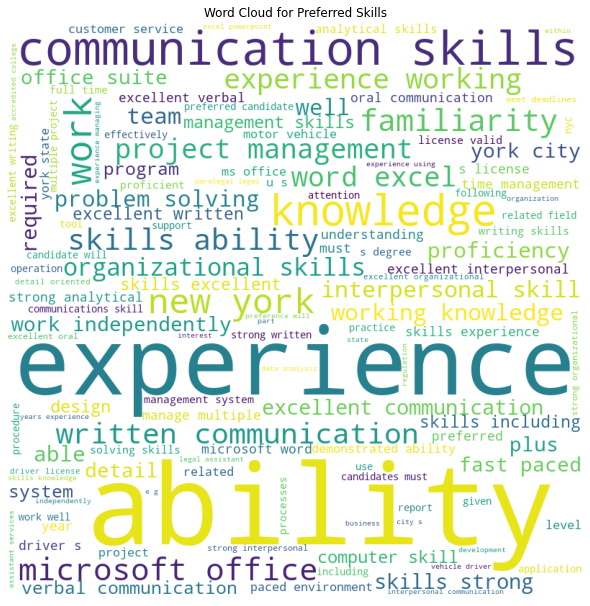

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['Preferred Skills']:

    # typecaste each val to string
    val = str(val)
    new_string=re.sub('[^a-zA-Z0-9]',' ',val)
    cleaned_string=re.sub('\s+',' ',new_string)

    # split the value
    tokens = cleaned_string.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Preferred Skills")

plt.show()

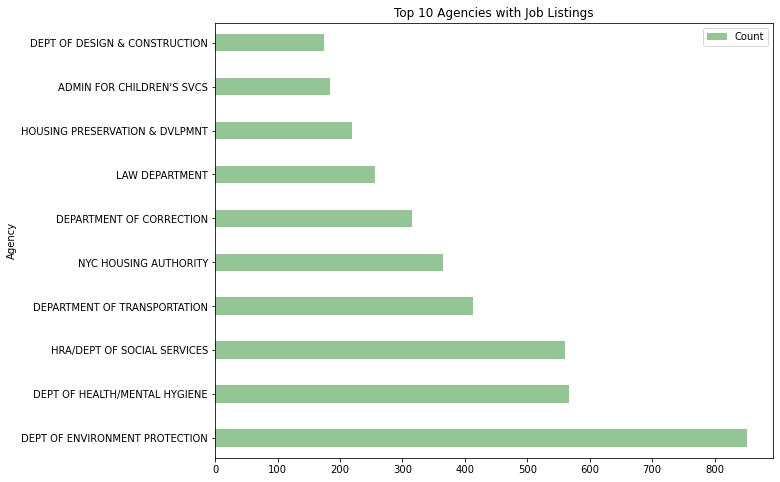

In [ ]:
skillList= []
for i in range(len(df["Agency"])):
    skillList.append(df["Agency"].iloc[i] )
dict0 = {i:skillList.count(i) for i in skillList}
sorted_skill = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_skills = pd.DataFrame(sorted_skill[:10], columns=['Agency', 'Count'])
ax = df_skills.plot.barh(x='Agency', y='Count',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Agencies with Job Listings")

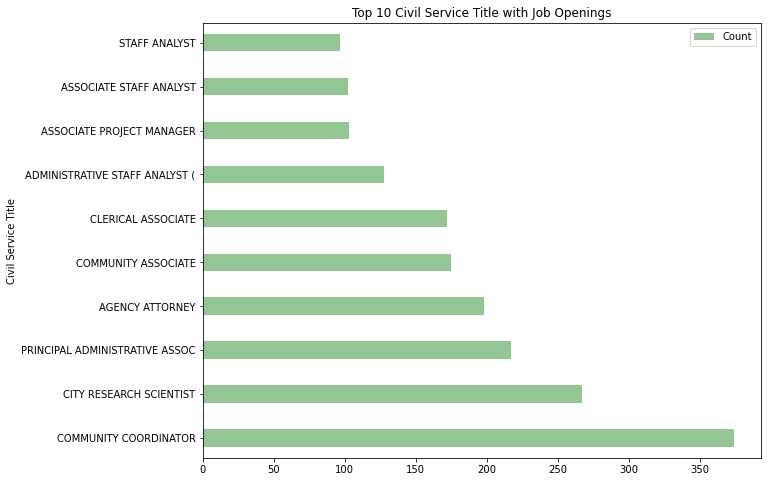

In [ ]:
skillList= []
for i in range(len(df["Civil Service Title"])):
    skillList.append(df["Civil Service Title"].iloc[i] )
dict0 = {i:skillList.count(i) for i in skillList}
sorted_skill = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_skills = pd.DataFrame(sorted_skill[:10], columns=['Civil Service Title', 'Count'])
ax = df_skills.plot.barh(x='Civil Service Title', y='Count',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Civil Service Title with Job Openings")

<Figure size 648x504 with 0 Axes>

Text(0.5, 1.0, 'Correlation between feature columns')

<AxesSubplot:title={'center':'Correlation between feature columns'}>

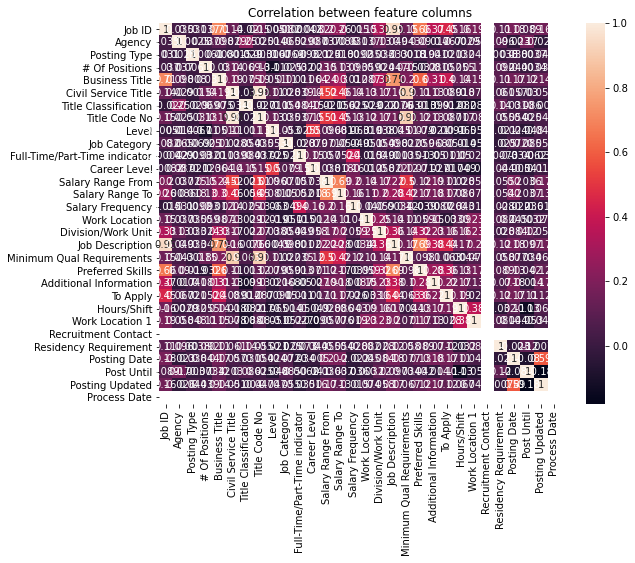

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Correlation between feature columns')
corr = df.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr,annot = True )

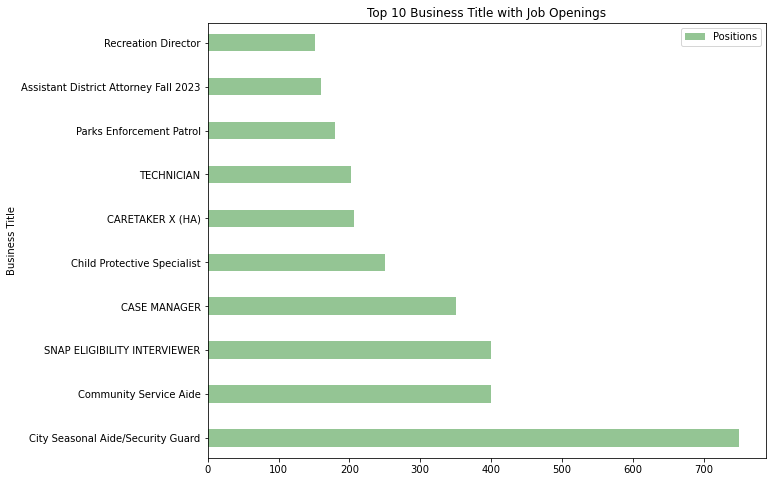

In [ ]:
titles= []
for i in range(len(df["Business Title"])):
    titles.append(df["Business Title"].iloc[i] )
dict0 = df.groupby('Business Title')['# Of Positions'].sum()
sorted_title = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_title = pd.DataFrame(sorted_title[:10], columns=['Business Title', 'Positions'])
ax = df_title.plot.barh(x='Business Title', y='Positions',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Business Title with Job Openings")

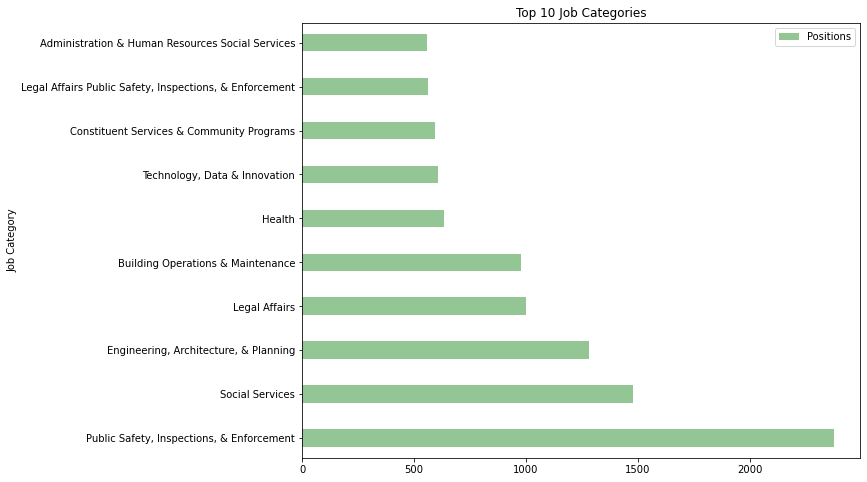

In [ ]:
titles= []
for i in range(len(df["Job Category"])):
    titles.append(df["Job Category"].iloc[i] )
dict0 = df.groupby('Job Category')['# Of Positions'].sum()
sorted_title = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_title = pd.DataFrame(sorted_title[:10], columns=['Job Category', 'Positions'])
ax = df_title.plot.barh(x='Job Category', y='Positions',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Job Categories")

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Minimum Qualification: Technology, Data & Innovation')

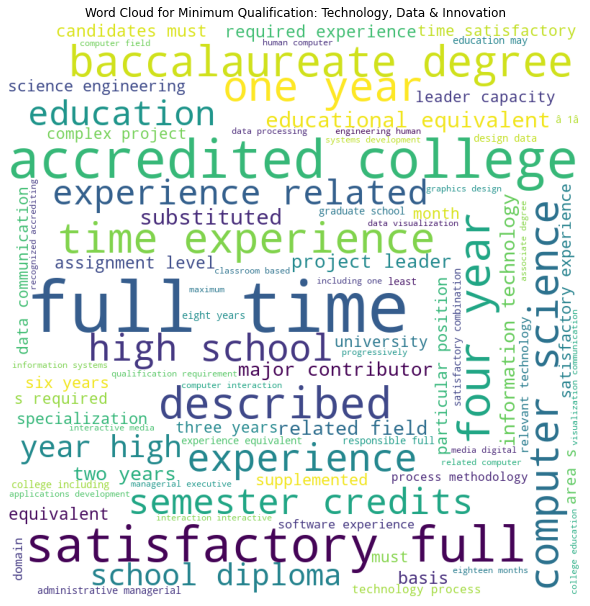

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#df_maxJC = df[df['Job Category']== 'Public Safety, Inspections, & Enforcement']
df_maxJC = df[df['Job Category']== 'Technology, Data & Innovation']
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_maxJC['Minimum Qual Requirements']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
#plt.title("Word Cloud for Minimum Qualification, Public Safety, Inspections, & Enforcement")
plt.title("Word Cloud for Minimum Qualification: Technology, Data & Innovation")

plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Preferred Skills: Technology, Data & Innovation')

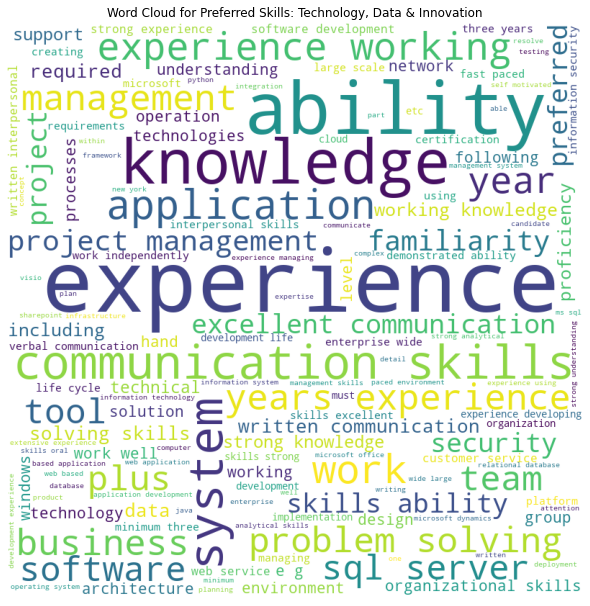

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

#df_maxJC = df[df['Job Category']== 'Public Safety, Inspections, & Enforcement']
df_maxJC = df[df['Job Category']== 'Technology, Data & Innovation']
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_maxJC['Preferred Skills']:

    # typecaste each val to string
    val = str(val)

    new_string=re.sub('[^a-zA-Z0-9]',' ',val)
    cleaned_string=re.sub('\s+',' ',new_string)

    # split the value
    tokens = cleaned_string.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
#plt.title("Word Cloud for Preferred Skills, Public Safety, Inspections, & Enforcement")
plt.title("Word Cloud for Preferred Skills: Technology, Data & Innovation")

plt.show()

In [15]:
analyst_data = df[df['Business Title'].str.contains('Analyst', case='False')]
analyst_data

Job ID                          Agency Posting Type  # Of Positions  \
37    556124  DEPT OF ENVIRONMENT PROTECTION     Internal               1   
48    556763       ADMIN TRIALS AND HEARINGS     External               1   
57    541272                 FIRE DEPARTMENT     Internal               1   
87    541012  DEPT OF ENVIRONMENT PROTECTION     External               1   
98    543753       ADMIN TRIALS AND HEARINGS     Internal               1   
...      ...                             ...          ...             ...   
5856  568527   DEPT OF DESIGN & CONSTRUCTION     External               1   
5890  523076   OFFICE OF MANAGEMENT & BUDGET     External               2   
5910  543906       ADMIN FOR CHILDREN'S SVCS     Internal               1   
5923  551383  DEPT OF ENVIRONMENT PROTECTION     Internal               1   
5926  540781        DEPARTMENT OF SANITATION     External               1   

                             Business Title             Civil Service Title  \
37                         Business Analyst  COMPUTER SPECIALIST (SOFTWARE)   
48         Silver Stars Procurement Analyst             PROCUREMENT ANALYST   
57             Administrative Staff Analyst  ADMINISTRATIVE STAFF ANALYST (   
87                    Bureau Energy Analyst         CITY RESEARCH SCIENTIST   
98                      Procurement Analyst             PROCUREMENT ANALYST   
...                                     ...                             ...   
5856  M/WBE Outreach and Compliance Analyst           COMMUNITY COORDINATOR   
5890                      Analyst  Closeout            BUDGET ANALYST (OMB)   
5910                     Operations Analyst         CITY RESEARCH SCIENTIST   
5923            Analyst - Vendor Management             COMMUNITY ASSOCIATE   
5926                         Energy Analyst         CITY RESEARCH SCIENTIST   

          Title Classification Title Code No Level  \
37               Competitive-1         13632    01   
48               Competitive-1         12158    03   
57               Competitive-1         1002A    00   
87           Non-Competitive-5         21744    02   
98               Competitive-1         12158    01   
...                        ...           ...   ...   
5856         Non-Competitive-5         56058    00   
5890  Pending Classification-2         06088    01   
5910         Non-Competitive-5         21744    02   
5923         Non-Competitive-5         56057    00   
5926         Non-Competitive-5         21744    02   

                                           Job Category  ...  \
37    Engineering, Architecture, & Planning Technolo...  ...   
48                   Finance, Accounting, & Procurement  ...   
57                Engineering, Architecture, & Planning  ...   
87    Engineering, Architecture, & Planning Technolo...  ...   
98                   Finance, Accounting, & Procurement  ...   
...                                                 ...  ...   
5856          Constituent Services & Community Programs  ...   
5890  Finance, Accounting, & Procurement Policy, Res...  ...   
5910        Policy, Research & Analysis Social Services  ...   
5923  Constituent Services & Community Programs Fina...  ...   
5926  Engineering, Architecture, & Planning Finance,...  ...   

                                 Additional Information  \
37    **** Only those applicants with permanent Civi...   
48                                                  NaN   
57    ***ONLY PERMANENT EMPLOYEES IN THE ADMINISTRAT...   
87    As of August 2, 2021, all new hires must be va...   
98                                                  NaN   
...                                                 ...   
5856                                                NaN   
5890  REQUIREMENTS:  Assistant Analyst ($51,550+): B...   
5910  Section 424-A of the New York Social Services ...   
5923  Driver License Requirement: At the time of app...   
5926                                                NaN   

     

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Preferred Skills, Analyst')

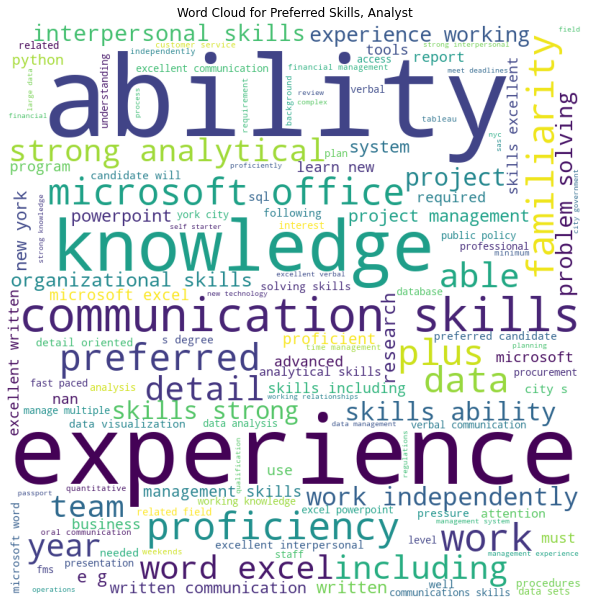

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in analyst_data['Preferred Skills']:

    # typecaste each val to string
    val = str(val)

    new_string=re.sub('[^a-zA-Z0-9]',' ',val)
    cleaned_string=re.sub('\s+',' ',new_string)

    # split the value
    tokens = cleaned_string.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Preferred Skills, Analyst")

plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Minimum Qualification, Analyst')

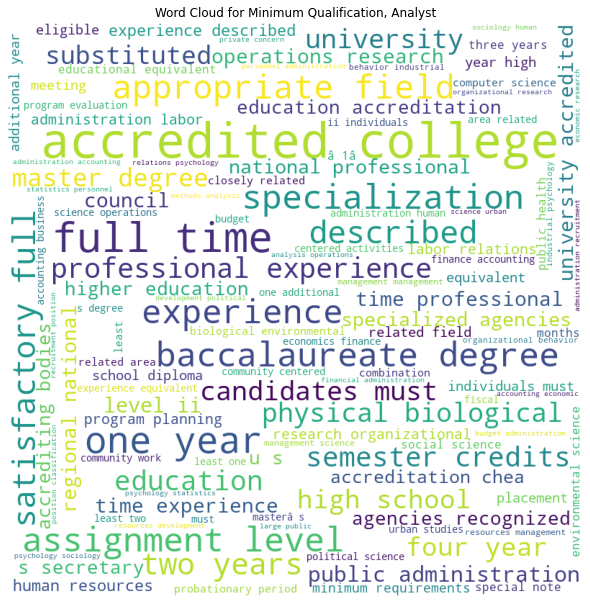

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in analyst_data['Minimum Qual Requirements']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud for Minimum Qualification, Analyst")

plt.show()

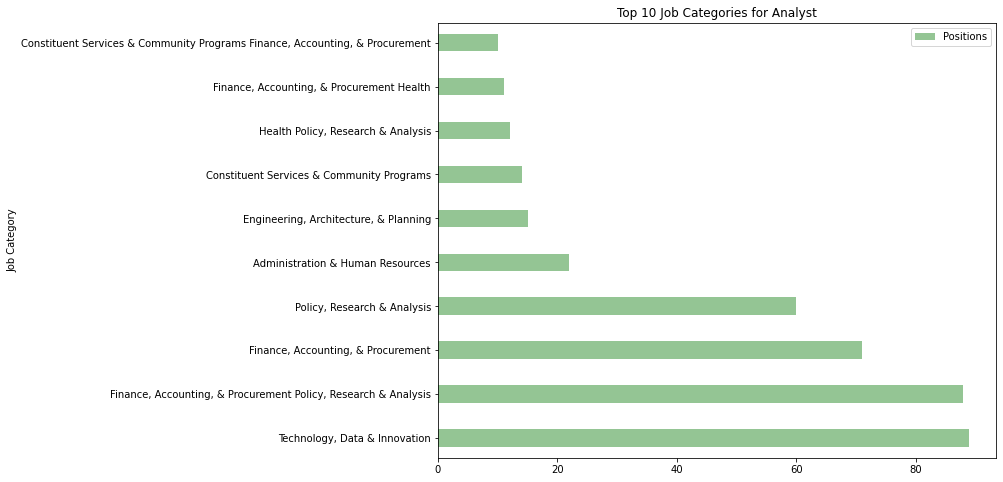

In [ ]:
titles= []
for i in range(len(analyst_data["Job Category"])):
    titles.append(analyst_data["Job Category"].iloc[i] )
dict0 = analyst_data.groupby('Job Category')['# Of Positions'].sum()
sorted_title = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_title = pd.DataFrame(sorted_title[:10], columns=['Job Category', 'Positions'])
ax = df_title.plot.barh(x='Job Category', y='Positions',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Job Categories for Analyst")

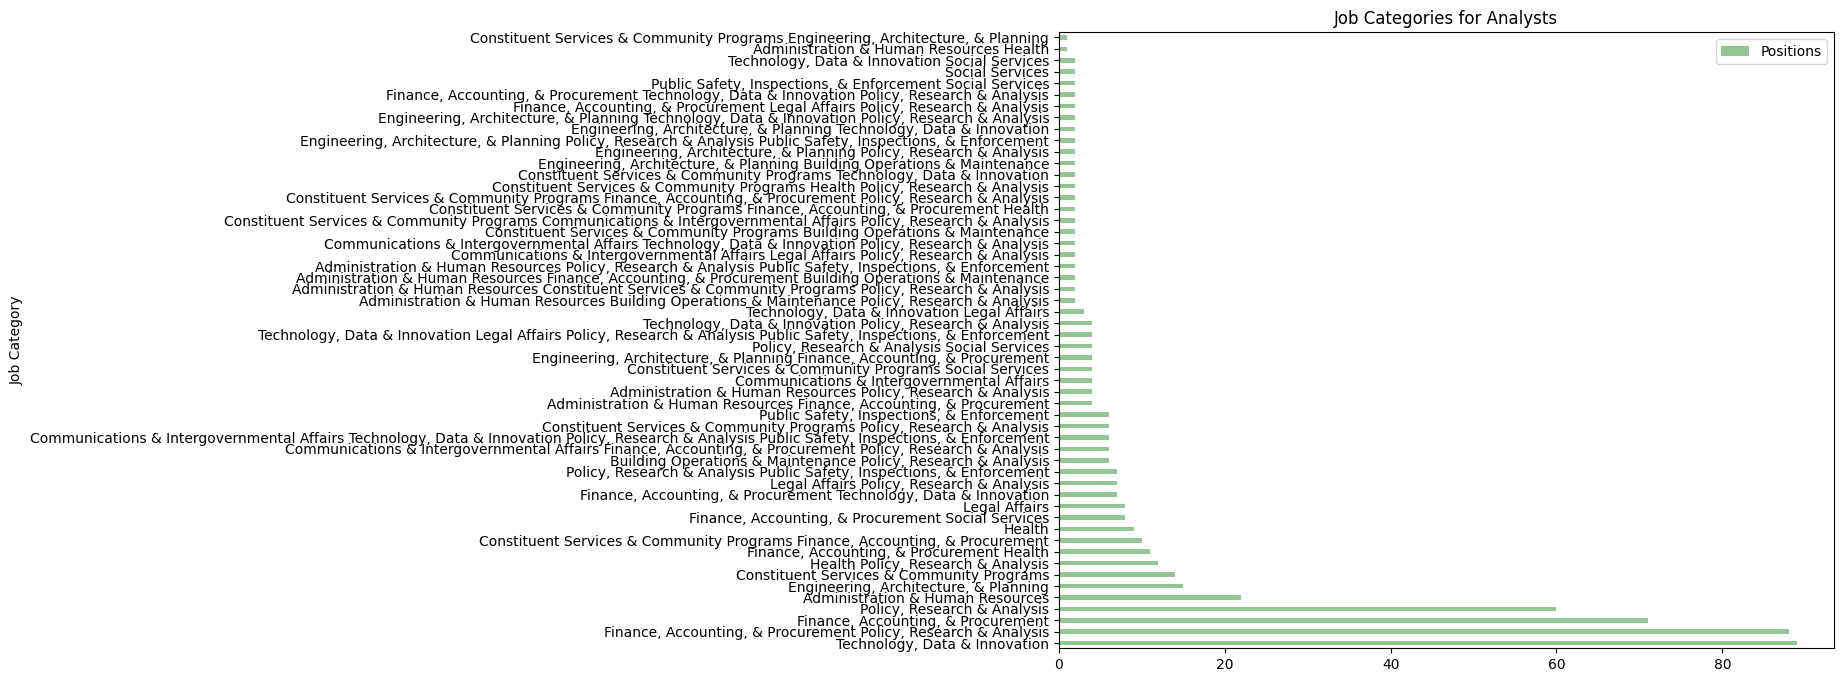

In [16]:
titles= []
for i in range(len(analyst_data["Job Category"])):
    titles.append(analyst_data["Job Category"].iloc[i] )
dict0 = analyst_data.groupby('Job Category')['# Of Positions'].sum()
sorted_title = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_title = pd.DataFrame(sorted_title, columns=['Job Category', 'Positions'])
ax = df_title.plot.barh(x='Job Category', y='Positions',figsize=(10,8),width=0.4,color='#94c594', title = "Job Categories for Analysts")